In [171]:
import matplotlib
import numpy as np
import pandas as pd


from datetime import date, datetime, time, timedelta
from matplotlib import pyplot as plt
from pylab import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error




%matplotlib inline


stk_path = "E:\ML models\CLX.csv"
test_size = 0.2                 
cv_size = 0.2                   
Nmax = 21                       
                                
    
   
fontsize = 14
ticklabelsize = 14
####################################

In [172]:
def get_preds_mov_avg(df, target_col, N, pred_min, offset):

    pred_list = df[target_col].rolling(window = N, min_periods=1).mean() # len(pred_list) = len(df)
    
    
    pred_list = np.concatenate((np.array([np.nan]), np.array(pred_list[:-1])))
    
    
    pred_list = np.array(pred_list)
    pred_list[pred_list < pred_min] = pred_min
    
    return pred_list[offset:]

def get_mape(y_true, y_pred):      #MAPE: Mean Absolute Percentage Error
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [173]:
df = pd.read_csv(stk_path, sep = ",")


df.loc[:, 'Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')


df.columns = [str(x).lower().replace(' ', '_') for x in df.columns]


df['month'] = df['date'].dt.month


df.sort_values(by='date', inplace=True, ascending=True)

df.head(10)

,date,open,high,low,close,adj_close,volume,month
0,2011-06-13,66.760002,67.059998,66.449997,66.760002,50.512547,703400,6
1,2011-06-14,67.110001,67.370003,66.930000,67.040001,50.724415,919700,6
2,2011-06-15,66.629997,66.980003,65.970001,66.300003,50.164494,948200,6
3,2011-06-16,66.089996,66.910004,66.089996,66.809998,50.550377,871700,6
4,2011-06-17,66.940002,67.980003,66.839996,67.540001,51.102718,1602300,6
5,2011-06-20,67.500000,68.099998,67.379997,67.860001,51.344837,664100,6
6,2011-06-21,68.220001,68.220001,67.720001,67.779999,51.284313,620300,6
7,2011-06-22,67.769997,68.050003,67.360001,67.430000,51.019489,480400,6
8,2011-06-23,66.900002,67.360001,66.459999,67.230003,50.868160,839200,6
9,2011-06-24,67.260002,67.389999,66.239998,66.290001,50.156921,1813000,6


Text(0, 0.5, 'USD')

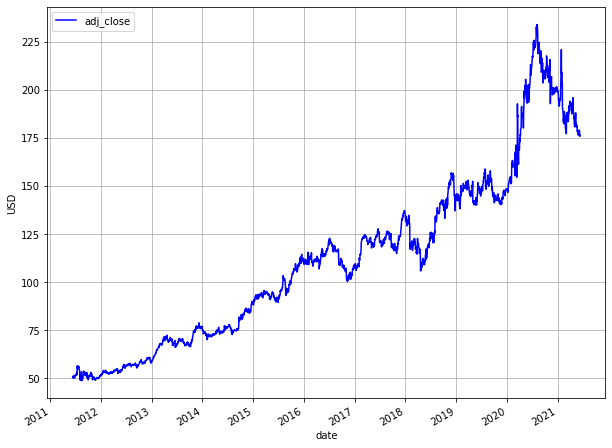

In [174]:

rcParams['figure.figsize'] = 10, 8 # width 10, height 8

ax = df.plot(x='date', y='adj_close', style='b-', grid=True)
ax.set_xlabel("date")
ax.set_ylabel("USD")

In [175]:
num_cv = int(cv_size*len(df))
num_test = int(test_size*len(df))
num_train = len(df) - num_cv - num_test
print("num_train = " + str(num_train))
print("num_cv = " + str(num_cv))
print("num_test = " + str(num_test))

train = df[:num_train]
cv = df[num_train:num_train+num_cv]
train_cv = df[:num_train+num_cv]
test = df[num_train+num_cv:]
print("train.shape = " + str(train.shape))
print("cv.shape = " + str(cv.shape))
print("train_cv.shape = " + str(train_cv.shape))
print("test.shape = " + str(test.shape))

num_train = 1510
num_cv = 503
num_test = 503
train.shape = (1510, 8)
cv.shape = (503, 8)
train_cv.shape = (2013, 8)
test.shape = (503, 8)


Text(0, 0.5, 'USD')

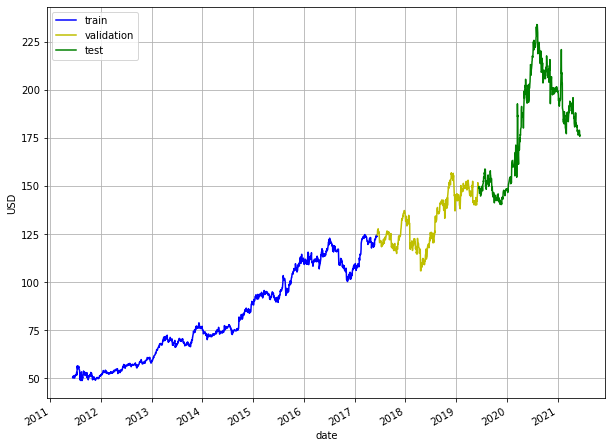

In [176]:

rcParams['figure.figsize'] = 10, 8 

ax = train.plot(x='date', y='adj_close', style='b-', grid=True)
ax = cv.plot(x='date', y='adj_close', style='y-', grid=True, ax=ax)
ax = test.plot(x='date', y='adj_close', style='g-', grid=True, ax=ax)
ax.legend(['train', 'validation', 'test'])
ax.set_xlabel("date")
ax.set_ylabel("USD")

In [177]:
RMSE = []
mape = []
for N in range(1, Nmax+1):
    est_list = get_preds_mov_avg(train_cv, 'adj_close', N, 0, num_train)
    
    cv.loc[:, 'est' + '_N' + str(N)] = est_list
    RMSE.append(math.sqrt(mean_squared_error(est_list, cv['adj_close'])))
    mape.append(get_mape(cv['adj_close'], est_list))
print('RMSE = ' + str(RMSE))
print('MAPE = ' + str(mape))
df.head()

RMSE = [1.8057693100799466, 1.9744500118223867, 2.149657009598943, 2.3137494150839064, 2.46383447736033, 2.6178146344521394, 2.761893805329918, 2.89339281547812, 3.0187067829220773, 3.1360142207939594, 3.25246605913078, 3.370165683939367, 3.489006666732171, 3.60807962349775, 3.7261344899521736, 3.8417495799712413, 3.953246217766087, 4.062673689195543, 4.168202000432973, 4.269031398976306, 4.366157760245741]
MAPE = [0.9517087441382178, 1.0726512279466656, 1.1723794289387262, 1.27737904482896, 1.37290391594963, 1.472548811683714, 1.5604424601496376, 1.64510078214344, 1.730620348296847, 1.812898337685781, 1.892963097269794, 1.9765273670292232, 2.063713107549294, 2.153671221434301, 2.2363766159791574, 2.313023842822678, 2.3867500017797108, 2.4594154396364325, 2.5323146369799696, 2.603739014535142, 2.6720209697178388]


,date,open,high,low,close,adj_close,volume,month
0,2011-06-13,66.760002,67.059998,66.449997,66.760002,50.512547,703400,6
1,2011-06-14,67.110001,67.370003,66.930000,67.040001,50.724415,919700,6
2,2011-06-15,66.629997,66.980003,65.970001,66.300003,50.164494,948200,6
3,2011-06-16,66.089996,66.910004,66.089996,66.809998,50.550377,871700,6
4,2011-06-17,66.940002,67.980003,66.839996,67.540001,51.102718,1602300,6


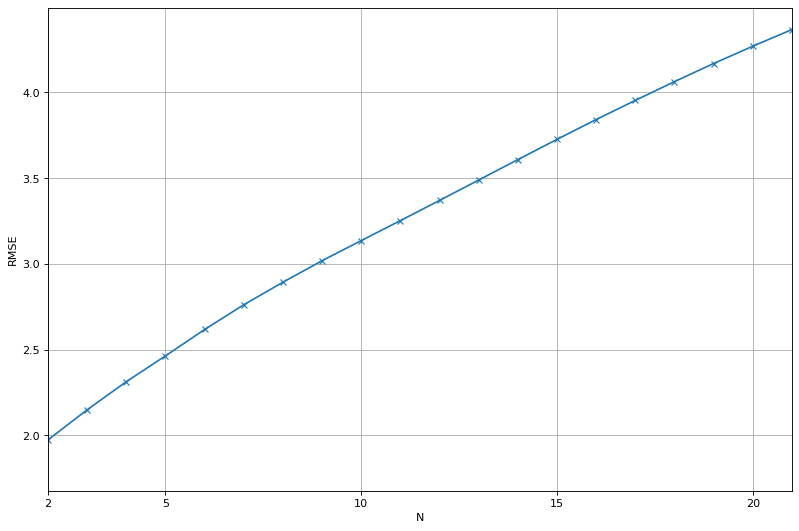

In [178]:
plt.figure(figsize=(12, 8), dpi=80)
plt.plot(range(1, Nmax+1), RMSE, 'x-')
plt.grid()
plt.xlabel('N')
plt.ylabel('RMSE')
plt.xlim([2, 21])
plt.xticks([2, 5, 10, 15, 20])
matplotlib.rcParams.update({'font.size': 14})

([<matplotlib.axis.XTick at 0xcf608b460>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

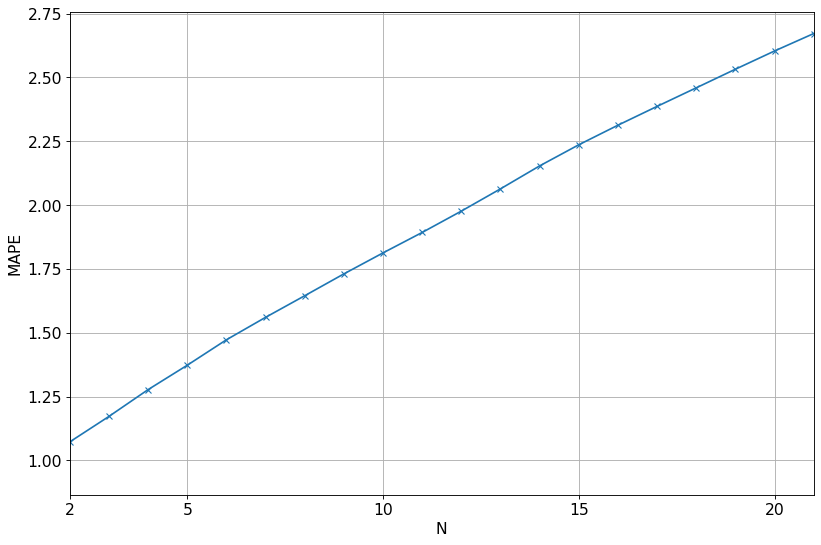

In [179]:
plt.figure(figsize=(12, 8), dpi=80)
plt.plot(range(1, Nmax+1), mape, 'x-')
plt.grid()
plt.xlabel('N')
plt.ylabel('MAPE')
plt.xlim([2, 21])
plt.xticks([2, 5, 10, 15, 20])

In [180]:
N_opt = 2

Text(0, 0.5, 'USD')

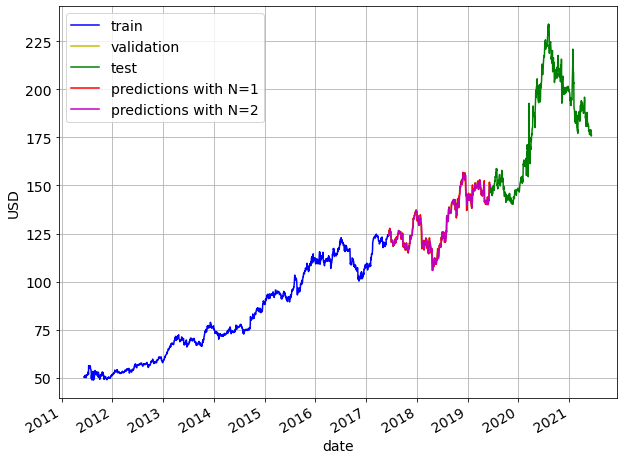

In [181]:
rcParams['figure.figsize'] = 10, 8

ax = train.plot(x='date', y='adj_close', style='b-', grid=True)
ax = cv.plot(x='date', y='adj_close', style='y-', grid=True, ax=ax)
ax = test.plot(x='date', y='adj_close', style='g-', grid=True, ax=ax)
ax = cv.plot(x='date', y='est_N1', style='r-', grid=True, ax=ax)
ax = cv.plot(x='date', y='est_N2', style='m-', grid=True, ax=ax)
ax.legend(['train', 'validation', 'test', 'predictions with N=1', 'predictions with N=2'])
ax.set_xlabel("date")
ax.set_ylabel("USD")

Text(0.5, 1.0, 'Zoom in to dev set')

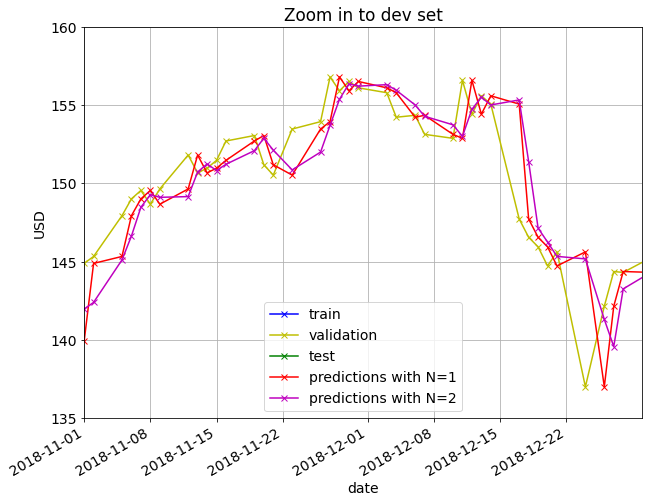

In [182]:
rcParams['figure.figsize'] = 10, 8

ax = train.plot(x='date', y='adj_close', style='bx-', grid=True)
ax = cv.plot(x='date', y='adj_close', style='yx-', grid=True, ax=ax)
ax = test.plot(x='date', y='adj_close', style='gx-', grid=True, ax=ax)
ax = cv.plot(x='date', y='est_N1', style='rx-', grid=True, ax=ax)
ax = cv.plot(x='date', y='est_N2', style='mx-', grid=True, ax=ax)
ax.legend(['train', 'validation', 'test', 'predictions with N=1', 'predictions with N=2'])
ax.set_xlabel("date")
ax.set_ylabel("USD")
ax.set_xlim([date(2018, 11, 1), date(2018, 12, 30)])
ax.set_ylim([135, 160])
ax.set_title('Zoom in to dev set')

In [183]:
est_list = get_preds_mov_avg(df, 'adj_close', N_opt, 0, num_train+num_cv)
test.loc[:, 'est' + '_N' + str(N_opt)] = est_list
print("RMSE = %0.3f" % math.sqrt(mean_squared_error(est_list, test['adj_close'])))
print("MAPE = %0.3f%%" % get_mape(test['adj_close'], est_list))
test.head()

RMSE = 3.424
MAPE = 1.212%


,date,open,high,low,close,adj_close,volume,month,est_N2
2013,2019-06-13,157.410004,157.850006,154.600006,155.979996,148.852020,1034800,6,149.372123
2014,2019-06-14,156.199997,157.300003,155.130005,156.880005,149.710876,697100,6,149.300552
2015,2019-06-17,157.220001,157.289993,154.210007,154.820007,147.745041,786700,6,149.281448
2016,2019-06-18,155.309998,155.559998,152.500000,153.639999,146.618942,766000,6,148.727958
2017,2019-06-19,153.350006,153.770004,151.820007,153.080002,146.084534,826600,6,147.181991


Text(0, 0.5, 'USD')

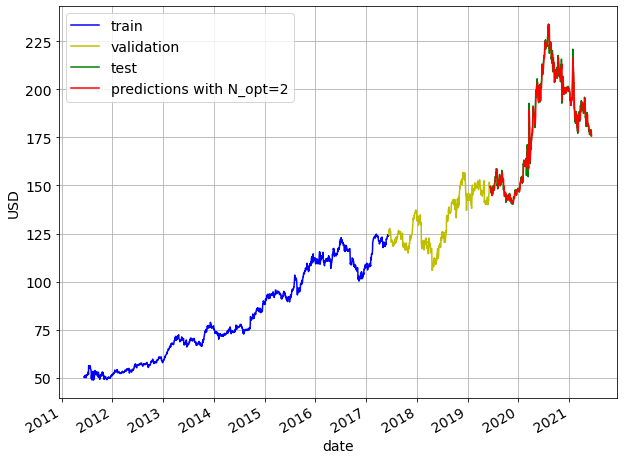

In [184]:
rcParams['figure.figsize'] = 10, 8

ax = train.plot(x='date', y='adj_close', style='b-', grid=True)
ax = cv.plot(x='date', y='adj_close', style='y-', grid=True, ax=ax)
ax = test.plot(x='date', y='adj_close', style='g-', grid=True, ax=ax)
ax = test.plot(x='date', y='est_N2', style='r-', grid=True, ax=ax)
ax.legend(['train', 'validation', 'test', 'predictions with N_opt=2'])
ax.set_xlabel("date")
ax.set_ylabel("USD")

Text(0.5, 1.0, 'Zoom in to test set')

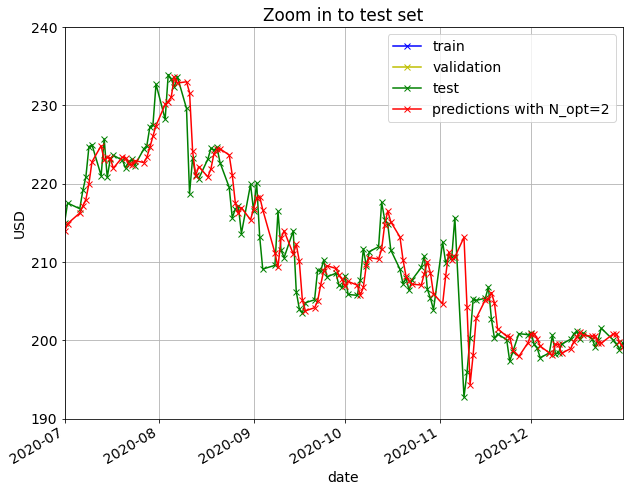

In [185]:
rcParams['figure.figsize'] = 10, 8 # width 10, height 8

ax = train.plot(x='date', y='adj_close', style='bx-', grid=True)
ax = cv.plot(x='date', y='adj_close', style='yx-', grid=True, ax=ax)
ax = test.plot(x='date', y='adj_close', style='gx-', grid=True, ax=ax)
ax = test.plot(x='date', y='est_N2', style='rx-', grid=True, ax=ax)
ax.legend(['train', 'validation', 'test', 'predictions with N_opt=2'])
ax.set_xlabel("date")
ax.set_ylabel("USD")
ax.set_xlim([date(2020, 7, 1), date(2020, 12, 31)])
ax.set_ylim([190, 240])
ax.set_title('Zoom in to test set')

(190.0, 240.0)

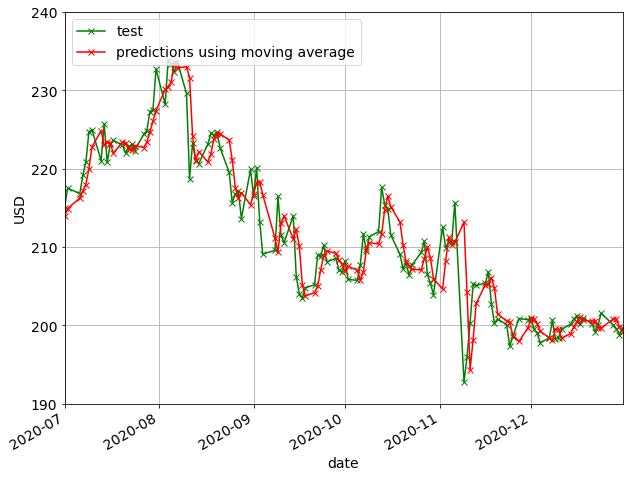

In [186]:
rcParams['figure.figsize'] = 10, 8
matplotlib.rcParams.update({'font.size': 14})

ax = test.plot(x='date', y='adj_close', style='gx-', grid=True)
ax = test.plot(x='date', y='est_N2', style='rx-', grid=True, ax=ax)
ax.legend(['test', 'predictions using moving average'], loc='upper left')
ax.set_xlabel("date")
ax.set_ylabel("USD")
ax.set_xlim([date(2020, 7, 1), date(2020, 12, 31)])
ax.set_ylim([190, 240])

In [187]:
test_moving_avg = test
test_moving_avg.to_csv("E:/ML models/test_moving_avg.csv")